![tutorial banner](https://github.com/PV-Tutorials/2025_pvlib_pvsc/blob/main/static/pvlib_pvsc_logo.png?raw=true)

# PART 1 - PV Systems Modeling with Python

Welcome to the 2025 PVSC tutorial on **PV Systems modeling with Python**. This tutorial will give an interactive introduction to how to model photovoltaic (PV) system energy yield using the open-source software [pvlib-python](https://pvlib-python.readthedocs.io/).

Part 1 introduces Google Collab and how to retrieve irradiance data using pvlib's iotools. Part 2 covers PV performance and can be found [here](https://colab.research.google.com/github/PV-Tutorials/2025_pvlib_pvsc/blob/main/pvlib-introduction-part-2.ipynb).

## Step 1: Getting familliar with Google Colab

This notebook can be seamlessly run in Google Colab, a free no-installation tool for running Python code from your web browser. 

Notebooks are organized by text and code "cells".  You can double-click a cell to start editing it.  To render a text cell, or execute a code cell, hit shift+enter.

In the code cell below, try out some math calculations to explore how the notebook and Python works:

In [ ]:
# write some code and execute it here
a = 1
b = 2
print(a*b)

In [1]:
# Try and change this code cell to a text cell

## Step 1: Install pvlib

First, we need to install pvlib in the Colab environment. Select the code cell below (left click) and execute it (shift+enter) to automatically download and install pvlib:

In [ ]:
!pip install pvlib==0.13.0

*Note, the outputs of pvlib's functions for retrieving PVGIS data changed in version 0.13.0, hence this tutorial requires pvlib>=0.13.0.*

## Step 2: Example of using pvlib

Here's a simple example of running pvlib code: using pvlib-python and pandas (a library for data analysis), calculate a clear-sky irradiance profile for the Travers Solar Project plant for today (June 8th, 2025).

In [2]:
# Import libraries
import pvlib
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Define location object
location = pvlib.location.Location(latitude=50.267, longitude=-112.718)

# Define time stamps
times = pd.date_range(
    start='2025-06-08 00:00',
    end='2025-06-08 23:59',
    freq='5min',
    tz='Canada/Mountain',
)

# Estimate clear-sky irradiance
clearsky_irradiance = location.get_clearsky(times)

<Axes: title={'center': 'Clear-Sky Simulation'}, ylabel='Irradiance [W/m2]'>

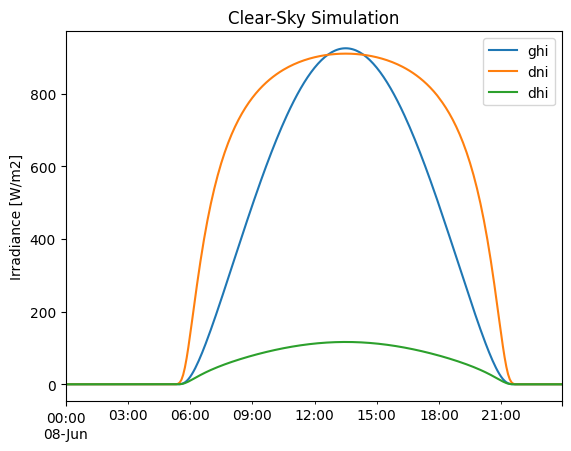

In [4]:
# Plot clear-sky irradiance
clearsky_irradiance.plot(ylabel='Irradiance [W/m2]', title='Clear-Sky Simulation')

If you want to know how to use a function, the first step should be to consult the function's page in the pvlib documentation (https://pvlib-python.readthedocs.io/en/stable/reference/index.html).

## Step 3: Irradiance data
Now, let's get serious and get some actual irradiance data. For this purpose, we will use pvlib's iotools module. You can read about the type of weather data supported [here](https://pvlib-python.readthedocs.io/en/stable/user_guide/weather_data.html) and the specific datasets [here](https://pvlib-python.readthedocs.io/en/v0.12.0/reference/iotools.html).

In this tutorial, we will retrieve TMY irradiance data from PVGIS. The relevant pvlib function is [``pvlib.iotools.get_pvgis_tmy``](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_pvgis_tmy.html).

**Can you figure out how to download weather data for the Travers Solar Project?**

*Hint:* To calculate the solar position correctly, you need to shift the index to be in the middle of the period. The data is labeled by the left edge (start of interval).

In [ ]:
# Write your code here to retrieve irradiance data
data, meta = pvlib.iotools...

# center the index in the middle of the hour
data.index = data.index + pd.Timedelta(minutes=30)

data

## Step 4: Investigate irradiance data options

Consult the list of iotools functions [here](https://pvlib-python.readthedocs.io/en/v0.12.0/reference/iotools.html) and see what other datasets cover the region you are from. Hint PVGIS is the only dataset with global coverage.

## Step 5: Calculate solar position

When using irradiance data, we almost always need to know the corresponding solar position for each time step.

Can you figure out how use pvlib to calculate the solar position for the time steps of the data downloaded in the previous step?

*Hint: the time steps are the index of the ``data`` DataFrame. To access the index, you can use DataFrame.index.*

In [7]:
# Write your code here to calculate solar position
solar_position = location.get_solarposition(....

solar_position.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
time(UTC),,,,,,
2018-01-01 00:30:00+00:00,155.274315,155.274315,-65.274315,-65.274315,44.019724,-3.336272
2018-01-01 01:30:00+00:00,146.187240,146.187240,-56.187240,-56.187240,65.585246,-3.355906
2018-01-01 02:30:00+00:00,135.625328,135.625328,-45.625328,-45.625328,79.792687,-3.375531
2018-01-01 03:30:00+00:00,124.609825,124.609825,-34.609825,-34.609825,90.713175,-3.395147
2018-01-01 04:30:00+00:00,113.607076,113.607076,-23.607076,-23.607076,100.270466,-3.414753


## Step 6: Navigate to Part 2
This tutorial gave a brief introduction on how to obtain solar irradiance data using pvlib's iotools. Once this has been done, we can move on to the actual PV performance modeling covered in Part 2, which can be found [here](https://colab.research.google.com/github/PV-Tutorials/2025_pvlib_pvsc/blob/main/pvlib-introduction-part-2.ipynb).

[![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)](http://creativecommons.org/licenses/by/4.0/)

This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).